<a href="https://colab.research.google.com/github/Hydixoo/PIS/blob/main/PIS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Формы

In [ ]:
print('Привет, мир!')

Привет, мир!


In [ ]:
#@title Форма 1
#@markdown <hr>
name = "\u0417\u0432\u0435\u0440\u0435\u0432\u0430 \u0415\u043B\u0438\u0437\u0430\u0432\u0435\u0442\u0430 \u042D\u0434\u0443\u0430\u0440\u0434\u043E\u0432\u043D\u0430" #@param {type:"string"}
group = "КИ19-20Б" #@param ["КИ19-20Б","КИ19-21Б","КИ19-22Б","КИ19-23Б","КИ19-24Б"]
date = "2021-02-20" #@param {type:"date"}
#@markdown ---
add_info = True #@param {type:"boolean"}
age = 19 #@param {type:"integer"}
year_study = 2 #@param {type:"slider", min:"1", max:"6", step:"1"}
average_grade = 4.7 #@param {type:"slider", min:"2", max:"5", step:"0.1"}


if name=="":
  print("Введите имя")
else:
  print("ФИО:", name)
  print("группа:", group)
  print("дата:", date)
  if add_info:
    print("возраст:", age)
    print("курс:", year_study)
    print("средний балл:", average_grade)

ФИО: Зверева Елизавета Эдуардовна
группа: КИ19-20Б
дата: 2021-02-20
возраст: 19
курс: 2
средний балл: 4.7


**Зверева Елизавета Эдуардовна**, группа КИ19-20Б, 20.02.2021

# Таблицы

In [ ]:
import pandas as pd
data1 = pd.read_csv("/content/sample_data/california_housing_test.csv")
print(data1)

      longitude  latitude  ...  median_income  median_house_value
0       -122.05     37.37  ...         6.6085            344700.0
1       -118.30     34.26  ...         3.5990            176500.0
2       -117.81     33.78  ...         5.7934            270500.0
3       -118.36     33.82  ...         6.1359            330000.0
4       -119.67     36.33  ...         2.9375             81700.0
...         ...       ...  ...            ...                 ...
2995    -119.86     34.42  ...         1.1790            225000.0
2996    -118.14     34.06  ...         3.3906            237200.0
2997    -119.70     36.30  ...         2.2895             62000.0
2998    -117.12     34.10  ...         3.2708            162500.0
2999    -119.63     34.42  ...         8.5608            500001.0

[3000 rows x 9 columns]


In [ ]:
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
%load_ext google.colab.data_table
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
data2 = pd.read_csv("/content/sample_data/mnist_test.csv",header=None)
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
%unload_ext google.colab.data_table

In [ ]:
#@title Задание 1
file = "mnist_test" #@param ["california_housing_test", "mnist_test"]
form_google = False #@param {type:"boolean"}
from IPython.display import display
if file == "california_housing_test":
  file_x=pd.read_csv("/content/sample_data/california_housing_test.csv")
elif file == "mnist_test":
  file_x = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)
    
%load_ext google.colab.data_table     
if form_google == True:
  display(file_x)
elif form_google == False:
  %unload_ext google.colab.data_table
  display(file_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Виджеты

In [ ]:
import ipywidgets as widgets
sl1 = widgets.IntSlider()
sl1

IntSlider(value=0)

In [ ]:
sl2 = widgets.IntSlider()
sl2

IntSlider(value=0)

In [ ]:
sl2.value = 25
sl2

IntSlider(value=25)

In [ ]:
from IPython.display import display
display(sl1, sl2)

IntSlider(value=0)

IntSlider(value=25)

In [ ]:
name = widgets.Text(value='Elizaveta')
display(name)

Text(value='Elizaveta')

In [ ]:
import time
pb1 = widgets.IntProgress(value=0,
                          min=1,
                          max=100,
                          description='Loading:',
                          bar_style='success',
                          # 'success', 'info', 'warning', 'danger' or ''
                          orientation='horizontal')
display(pb1)

for i in range(100):
  pb1.value = i+1
  time.sleep(0.25)

IntProgress(value=1, bar_style='success', description='Loading:', min=1)

# Кнопки

In [ ]:
v1 = widgets.Button(description="Кнопка")
output = widgets.Output()
display(v1, output)

Button(description='Кнопка', style=ButtonStyle())

Output()

In [ ]:
def on_my_button_click(b):
  with output:
    print("Кнопка нажата")

v1.on_click(on_my_button_click)
display(v1, output)

Button(description='Кнопка', style=ButtonStyle())

Output()

In [ ]:
def on_my_button_click(b):
  with output:
    output.clear_output()
    print("Кнопка нажата")
display(v1, output)

Button(description='Кнопка', style=ButtonStyle())

Output()

In [ ]:
#@title Задание 2
import ipywidgets as widgets
knopka1=widgets.Button(description="Информация")
output1= widgets.Output()
knopka2=widgets.Button(description="Описательная статистика")
output2= widgets.Output()
def on_my_knopka_click1(b):
  with output1:
    print(file_x.info())
knopka1.on_click(on_my_knopka_click1)
display(knopka1, output1)
def on_my_knopka_click2(b):
  with output2:
    print(file_x.describe())
knopka2.on_click(on_my_knopka_click2)
display(knopka2, output2)

Button(description='Информация', style=ButtonStyle())

Output()

Button(description='Описательная статистика', style=ButtonStyle())

Output()

# Взаимодействие

In [ ]:
def say_my_name(name):
  print(f'My name is {name}')

widgets.interact(say_my_name, name=["Jim", "Emma", "Tim"]);

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Tim'), value='Jim'), Output()), _d…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)

def my_sin(x, amp, w, phi):
  return(amp*np.sin(w*(x-phi)))

%matplotlib inline
from IPython.display import clear_output

In [ ]:
def draw_sin(w, amp, phi):
  y = my_sin(x, amp, w, phi)

  fig, ax = plt.subplots(figsize=(8,6)) #ax - массив с осями элементов, не х и у
  ax.set_ylim([-4, 4])
  ax.grid(True)
  ax.plot(x, y, color='red')

  print(w,amp,phi)

widgets.interact(draw_sin,
                 w=(0, 10, 1),
                 amp=(0, 4, .1),
                 phi=(0, 2*np.pi+0.01, 0.01))

interactive(children=(IntSlider(value=5, description='w', max=10), FloatSlider(value=2.0, description='amp', m…

<function __main__.draw_sin>

# Информация

In [ ]:
import pandas as pd

data = pd.read_csv('/content/sample_data/california_housing_test.csv')
display(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


# Разведочный анализ данных

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

In [ ]:
# data import

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
    header=None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
names = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
data.columns = names
data = data.drop(columns=['ID'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
data['Class'].replace({1: "building_float",
                       2: "building_non_float",
                       3: "vehicle_float",
                       4: "vehicle_non_float",
                       5: "containers",
                       6: "tableware",
                       7: "headlamps"
                      }, inplace=True)
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_float


In [ ]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col] = np.nan

data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,NaN,4.49,1.10,71.78,0.06,8.75,0.0,0.00,NaN
1,NaN,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,building_float
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,0.00,building_float
4,1.51742,13.27,3.62,1.24,NaN,0.55,8.07,0.0,0.00,building_float
5,1.51596,12.79,3.61,NaN,72.97,0.64,8.07,0.0,0.26,building_float
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,building_float
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,building_float
8,NaN,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,building_float
9,1.51755,NaN,3.60,1.36,72.99,0.57,8.40,0.0,0.11,building_float


In [ ]:
# data visualization

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      195 non-null    float64
 1   Na      197 non-null    float64
 2   Mg      195 non-null    float64
 3   Al      201 non-null    float64
 4   Si      199 non-null    float64
 5   K       199 non-null    float64
 6   Ca      195 non-null    float64
 7   Ba      197 non-null    float64
 8   Fe      203 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,195.000000,197.000000,195.000000,201.000000,199.000000,199.000000,195.000000,197.000000,203.000000
mean,1.518389,13.404061,2.674462,1.428358,72.637136,0.505829,8.918410,0.181878,0.058079
std,0.003121,0.832834,1.454687,0.491527,0.797879,0.671574,1.400748,0.505293,0.099109
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516485,12.890000,1.985000,1.190000,72.235000,0.135000,8.235000,0.000000,0.000000
50%,1.517690,13.270000,3.480000,1.350000,72.760000,0.550000,8.590000,0.000000,0.000000
75%,1.519155,13.810000,3.610000,1.620000,73.100000,0.610000,9.140000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
display(data['Class'].describe())
print('============================')
display(data['Class'].value_counts())

count                197
unique                 6
top       building_float
freq                  68
Name: Class, dtype: object

building_float        68
building_non_float    64
headlamps             27
vehicle_float         17
containers            12
tableware              9
Name: Class, dtype: int64

In [ ]:
for col in data.columns:
  missing_values_counts = data[col].isna().sum()
  percentage = 100*data[col].isna().sum()/len(data[col])
  print("Column",col,"contains",missing_values_counts, "NULL values (", percentage, "% ).")

Column RI contains 19 NULL values ( 8.878504672897197 % ).
Column Na contains 17 NULL values ( 7.94392523364486 % ).
Column Mg contains 19 NULL values ( 8.878504672897197 % ).
Column Al contains 13 NULL values ( 6.074766355140187 % ).
Column Si contains 15 NULL values ( 7.009345794392523 % ).
Column K contains 15 NULL values ( 7.009345794392523 % ).
Column Ca contains 19 NULL values ( 8.878504672897197 % ).
Column Ba contains 17 NULL values ( 7.94392523364486 % ).
Column Fe contains 11 NULL values ( 5.140186915887851 % ).
Column Class contains 17 NULL values ( 7.94392523364486 % ).


#Гистограммы

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

(array([ 8., 19., 42., 78., 29., 11.,  6.,  4.,  3.,  1.]),
 array([0.29 , 0.611, 0.932, 1.253, 1.574, 1.895, 2.216, 2.537, 2.858,
        3.179, 3.5  ]),
 <a list of 10 Patch objects>)

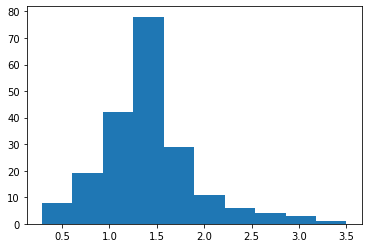

In [ ]:
col = 'Al'
plt.hist(data[col])

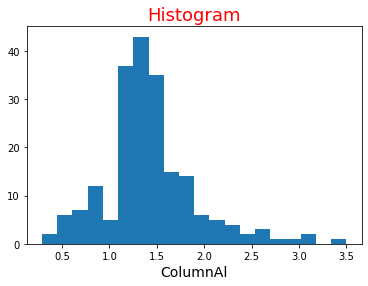

In [ ]:
fig, ax = plt.subplots()

ax.hist(data[col], bins=20)
ax.set_xlabel("Column"+str(col), fontsize=14)
ax.set_title("Histogram", color='red', fontsize=18)

plt.show()

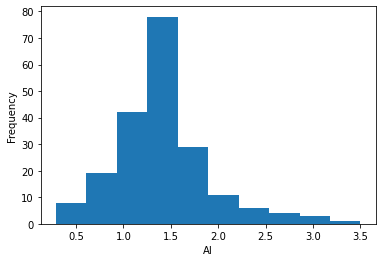

In [ ]:
ax = data[col].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

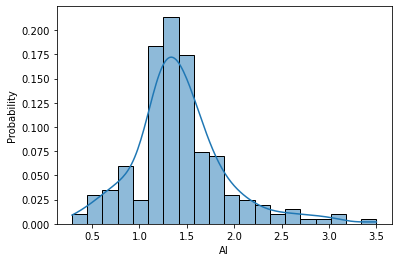

In [ ]:
sns.histplot(data=data,x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show()

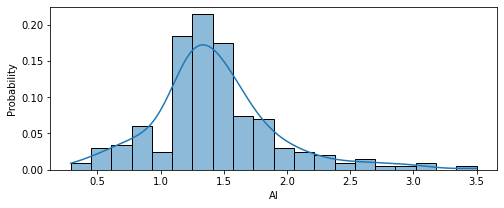

In [ ]:
plt.figure(figsize=(8,3))
ax = sns.histplot(data=data,x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show()

# Bar plot

In [ ]:
col = 'Class'

In [ ]:
df1 = data[col].value_counts()
df1

building_float        68
building_non_float    64
headlamps             27
vehicle_float         17
containers            12
tableware              9
Name: Class, dtype: int64

In [ ]:
df1.index.values

array(['building_float', 'building_non_float', 'headlamps',
       'vehicle_float', 'containers', 'tableware'], dtype=object)

In [ ]:
df1.values

array([68, 64, 27, 17, 12,  9])

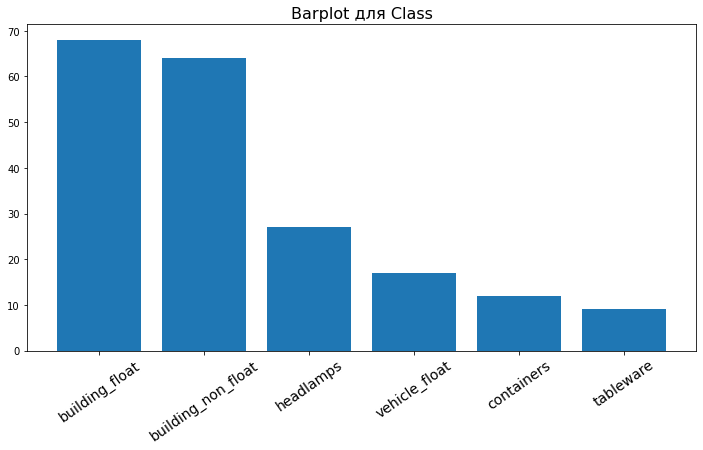

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(data[col].value_counts().index.values,
       data[col].value_counts().values)

ax.set_xlabel(None,fontsize=16)
ax.set_title('Barplot для '+str(col), fontsize=16)
ax.tick_params(axis='x', which='major', labelsize=14, rotation=35)

plt.show()

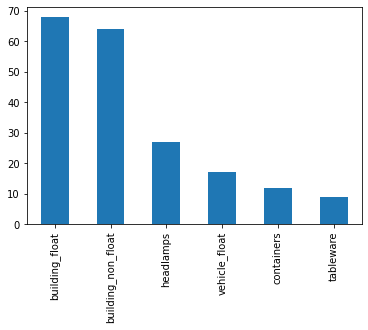

In [ ]:
data[col].value_counts().plot(kind='bar')
plt.show()

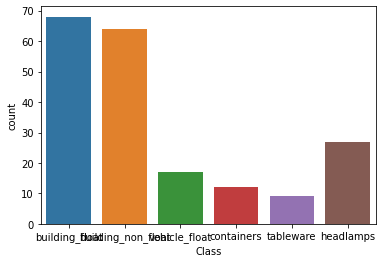

In [ ]:
sns.countplot(data=data, x=col)
plt.show()

# Ящик с усами

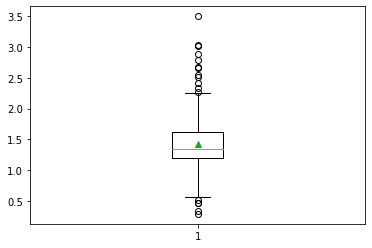

In [ ]:
col='Al'

fig, ax = plt.subplots()
ax.boxplot(data[col][~np.isnan(data[col])], showmeans=True)

plt.show()

In [ ]:
~np.isnan(data[col])

0      True
1      True
2      True
3      True
4      True
       ... 
209    True
210    True
211    True
212    True
213    True
Name: Al, Length: 214, dtype: bool

In [ ]:
data[col][~np.isnan(data[col])]

0      1.10
1      1.36
2      1.54
3      1.29
4      1.24
       ... 
209    2.88
210    1.99
211    2.02
212    1.94
213    2.08
Name: Al, Length: 201, dtype: float64

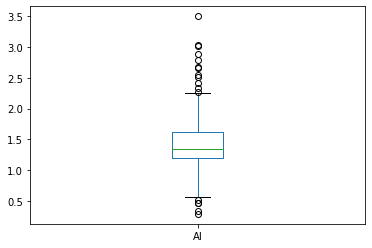

In [ ]:
data[col].plot(kind='box')
plt.show()

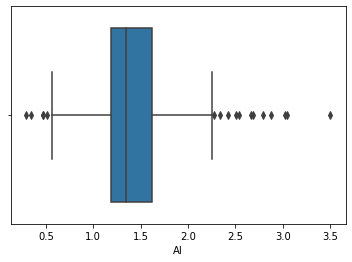

In [ ]:
sns.boxplot(data=data, x=col)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


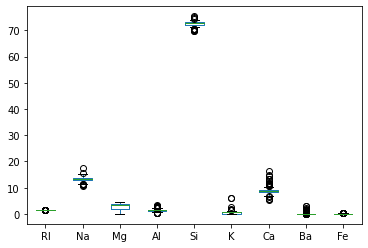

In [ ]:
data.plot(kind='box')
plt.show()

In [ ]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [ ]:
data.columns.values != 'Si'

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
data.columns.values[data.columns.values != 'Si']

array(['RI', 'Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


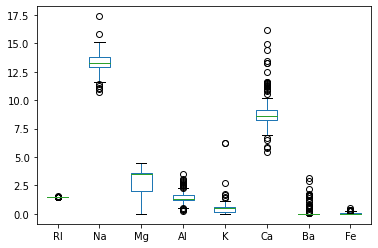

In [ ]:
data[data.columns.values[data.columns.values != 'Si']].plot(kind='box')
plt.show()

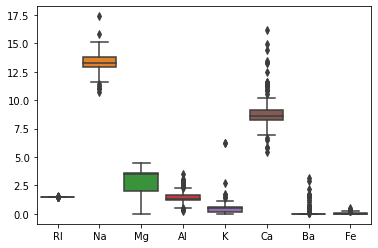

In [ ]:
sns.boxplot(data=data[data.columns.values[data.columns.values != 'Si']])
plt.show()

# Масштабирование

In [ ]:
import sklearn.preprocessing as prp

In [ ]:
#obj = Model
#obj.fit
#obj.predict / obj.transform
#(obj.fit_transform)

In [ ]:
scaler1 = prp.MinMaxScaler()
datascaled1 = scaler1.fit_transform(data[data.columns.values[data.columns.values != 'Class']])
datascaled1 = pd.DataFrame(datascaled1,
                           columns=data.columns.values[data.columns.values != 'Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


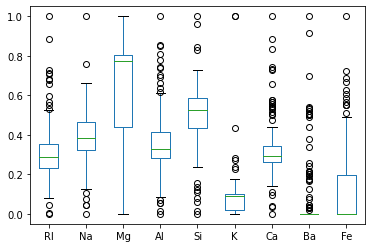

In [ ]:
datascaled1.plot(kind='box')
plt.show()

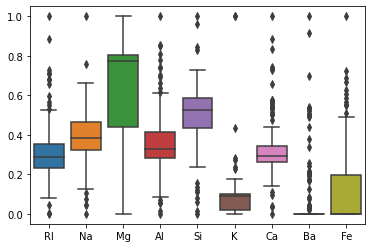

In [ ]:
sns.boxplot(data=datascaled1)
plt.show()

In [ ]:
scaler2 = prp.StandardScaler()
datascaled2 = scaler2.fit_transform(data[data.columns.values[data.columns.values != 'Class']])
datascaled2 = pd.DataFrame(datascaled2,
                           columns=data.columns.values[data.columns.values != 'Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


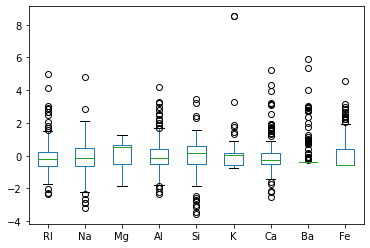

In [ ]:
datascaled2.plot(kind='box')
plt.show()

# Парные графики

In [ ]:
col1 = 'Mg'
col2 = 'Fe'

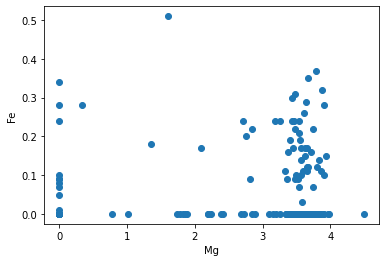

In [ ]:
fig, ax = plt.subplots()

ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_ylabel(col2)

plt.show()

In [ ]:
df1 = data['Class'].value_counts()
df1.index.values

array(['building_float', 'building_non_float', 'headlamps',
       'vehicle_float', 'containers', 'tableware'], dtype=object)

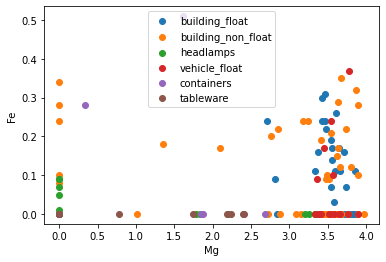

In [ ]:
fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][data['Class']==glassType],
             data[col2][data['Class']==glassType],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


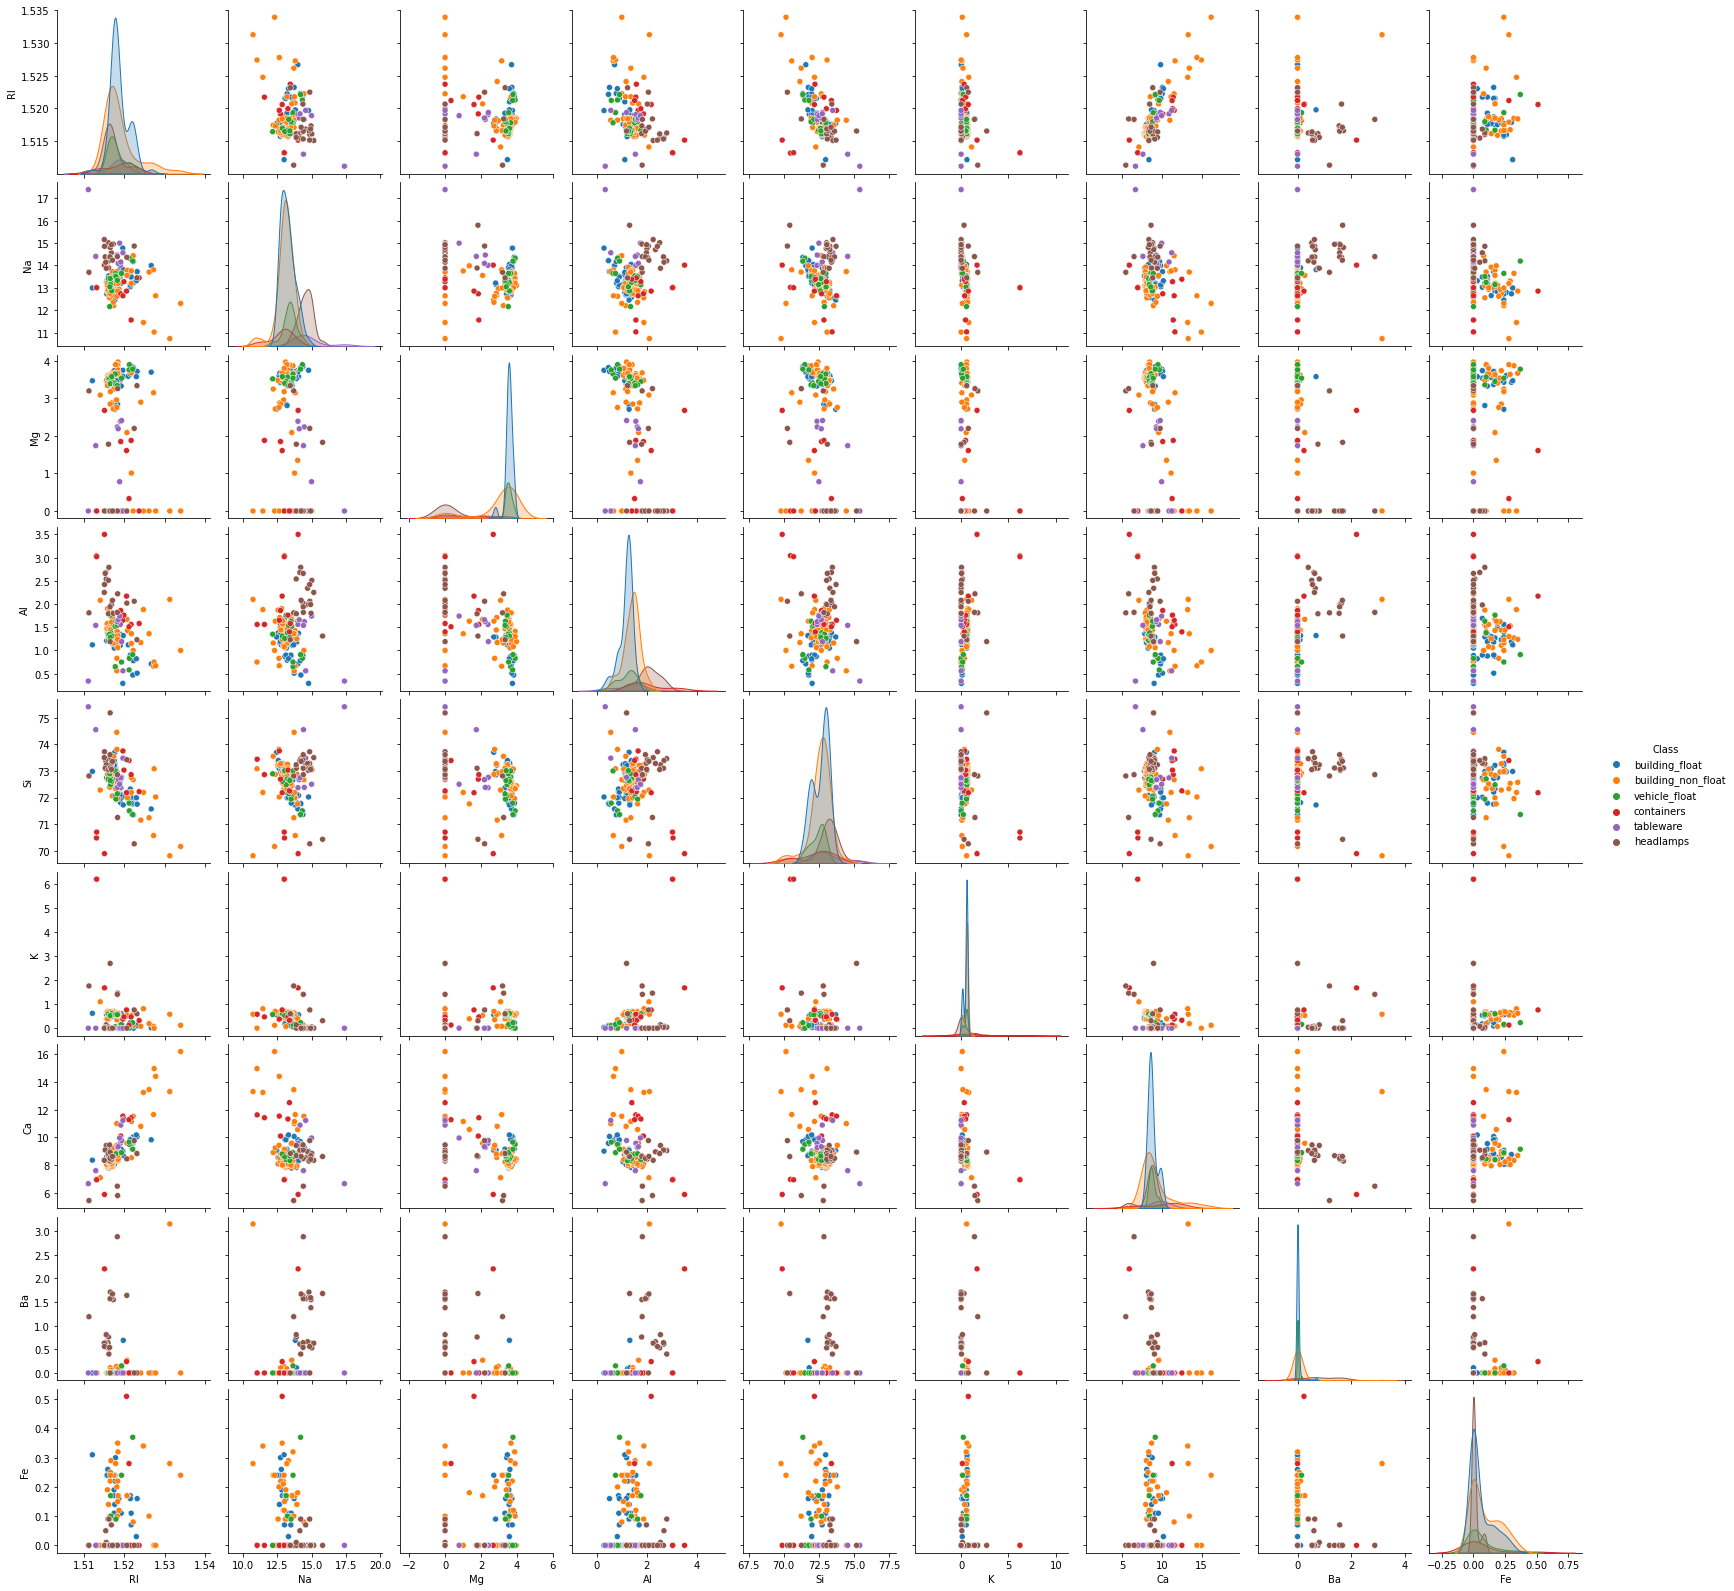

In [ ]:
sns.pairplot(data=data, hue='Class')
plt.show()


Виджеты, выпадающий список с названиями столбцов, показать гистограмму
В последнем столбце bar plot


---


С помощью виджетов сделать отрисовку всех переменных на выбор: boxplot или парные графики


---



In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as prepro
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
data =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header = None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
names =["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
data.columns=names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [ ]:
data['Class'].replace(
                      {
                       1:"building_windows_float",
                       2:"building_windows_non_float",
                       3:"vehicle_windows_float",
                       4:"vehicle_windows_non_float",
                       5:"containers",
                       6:"tableware",
                       7:"headlamps",
                      },inplace=True)
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float


In [ ]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col]=np.nan
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,building_windows_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_windows_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,NaN,building_windows_float
3,NaN,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_windows_float
4,NaN,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,building_windows_float
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_windows_float
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,building_windows_float
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,building_windows_float
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,building_windows_float
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,building_windows_float


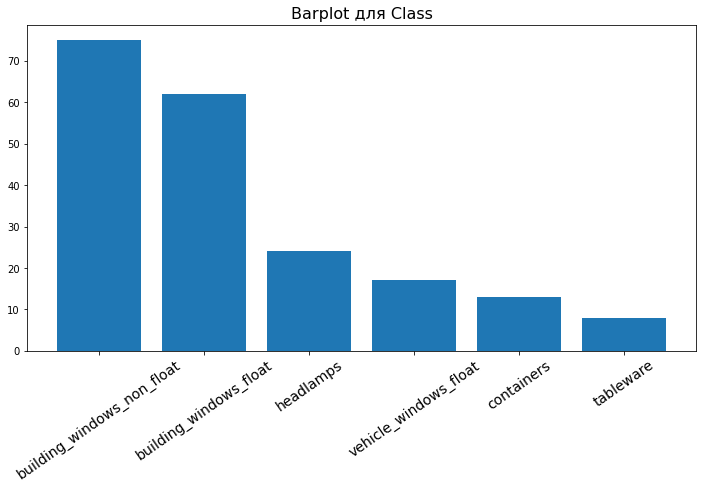

In [ ]:
#@title Задание 1
#@markdown -----
data_x = "Class" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe","Class"]
col1="RI"
col2="Na"
col3="Mg"
col4="Al"
col5="Si"
col6="K"
col7="Ca"
col8="Ba"
col9="Fe"
col10="Class"
if data_x == "RI":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col1])
  ax.set_xlabel("Column"+str(col1),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Na":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col2])
  ax.set_xlabel("Column"+str(col2),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Mg":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col3])
  ax.set_xlabel("Column"+str(col3),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Al":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col4])
  ax.set_xlabel("Column"+str(col4),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Si":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col5])
  ax.set_xlabel("Column"+str(col5),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "K":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col6])
  ax.set_xlabel("Column"+str(col6),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Ca":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col7])
  ax.set_xlabel("Column"+str(col7),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Ba":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col8])
  ax.set_xlabel("Column"+str(col8),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Fe":
  fig , ax = plt.subplots(figsize=(6,4))
  ax.hist(data[col9])
  ax.set_xlabel("Column"+str(col9),fontsize=14)
  ax.set_title("Histogram",color='red',fontsize=18)
  plt.show()
elif data_x == "Class":
  fig,ax =plt.subplots(figsize=(12,6))
  ax.bar(data[col10].value_counts().index.values,data[col10].value_counts().values)
  ax.set_xlabel(None,fontsize=16)
  ax.set_title('Barplot для '+str(col10),fontsize=16)
  ax.tick_params(axis='x',which='major',labelsize=14,rotation=35)
  plt.show()

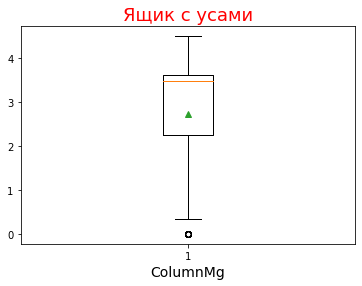

In [ ]:
#@title Задание 2
#@markdown ---
data_y = "Mg" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe"]
col1="RI"
col2="Na"
col3="Mg"
col4="Al"
col5="Si"
col6="K"
col7="Ca"
col8="Ba"
col9="Fe"
if data_y == "RI":
  fig, ax=plt.subplots()
  ax.boxplot(data[col1][~np.isnan(data[col1])],showmeans=True)
  ax.set_xlabel("Column"+str(col1),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Na":
  fig, ax=plt.subplots()
  ax.boxplot(data[col2][~np.isnan(data[col2])],showmeans=True)
  ax.set_xlabel("Column"+str(col2),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Mg":
  fig, ax=plt.subplots()
  ax.boxplot(data[col3][~np.isnan(data[col3])],showmeans=True)
  ax.set_xlabel("Column"+str(col3),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Al":
  fig, ax=plt.subplots()
  ax.boxplot(data[col4][~np.isnan(data[col4])],showmeans=True)
  ax.set_xlabel("Column"+str(col4),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Si":
  fig, ax=plt.subplots()
  ax.boxplot(data[col5][~np.isnan(data[col5])],showmeans=True)
  ax.set_xlabel("Column"+str(col5),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "K":
  fig, ax=plt.subplots()
  ax.boxplot(data[col6][~np.isnan(data[col6])],showmeans=True)
  ax.set_xlabel("Column"+str(col6),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Ca":
  fig, ax=plt.subplots()
  ax.boxplot(data[col7][~np.isnan(data[col7])],showmeans=True)
  ax.set_xlabel("Column"+str(col7),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Ba":
  fig, ax=plt.subplots()
  ax.boxplot(data[col8][~np.isnan(data[col8])],showmeans=True)
  ax.set_xlabel("Column"+str(col8),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()
elif data_y == "Fe":
  fig, ax=plt.subplots()
  ax.boxplot(data[col9][~np.isnan(data[col9])],showmeans=True)
  ax.set_xlabel("Column"+str(col9),fontsize=14)
  ax.set_title("Ящик с усами",color='red',fontsize=18)
  plt.show()

<function matplotlib.pyplot.show>

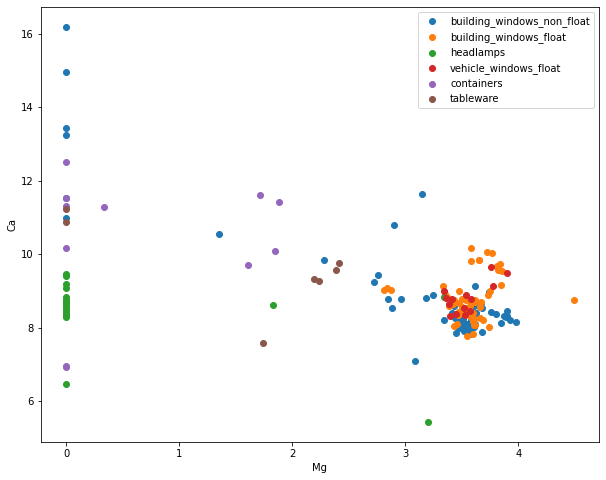

In [ ]:
#@title Задание 3
#@markdown ---
data_z1 = "Mg" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe"]
data_z2 = "Ca" #@param ["RI", "Na",	"Mg", "Al",	"Si", "K", "Ca", "Ba", "Fe"]
col1="RI"
col2="Na"
col3="Mg"
col4="Al"
col5="Si"
col6="K"
col7="Ca"
col8="Ba"
col9="Fe"

fig, ax = plt.subplots(figsize=(10,8))

for glassType in data['Class'].value_counts().index.values: 
  ax.scatter(data[data_z1][data['Class']==glassType],data[data_z2] [data['Class']==glassType],label=glassType)

ax.set_xlabel(data_z1)
ax.set_ylabel(data_z2)
ax.legend()
plt.show

#NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      197 non-null    float64
 1   Na      197 non-null    float64
 2   Mg      201 non-null    float64
 3   Al      203 non-null    float64
 4   Si      199 non-null    float64
 5   K       201 non-null    float64
 6   Ca      197 non-null    float64
 7   Ba      203 non-null    float64
 8   Fe      197 non-null    float64
 9   Class   199 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [ ]:
data_fillna_mean = data.fillna(data.mean()).copy()

In [ ]:
data_fillna_mean.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518403,13.426193,2.715920,1.437734,72.642714,0.510398,8.992690,0.174680,0.060761
std,0.002946,0.777608,1.377766,0.476916,0.749996,0.646201,1.322389,0.485262,0.095926
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516585,12.962500,2.477500,1.190000,72.330000,0.162500,8.312500,0.000000,0.000000
50%,1.517875,13.360000,3.470000,1.405000,72.730000,0.545000,8.700000,0.000000,0.000000
75%,1.519105,13.787500,3.587500,1.617500,73.057500,0.607500,9.140000,0.000000,0.097500
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
data['Class'].value_counts()

building_windows_non_float    75
building_windows_float        62
headlamps                     24
vehicle_windows_float         17
containers                    13
tableware                      8
Name: Class, dtype: int64

In [ ]:
data['Class'].value_counts().index.values[0]

'building_windows_non_float'

In [ ]:
data['Class'].mode()

0    building_windows_non_float
dtype: object

In [ ]:
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0],
                                 inplace=True)

#PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_*100

array([4.42941469e+01, 2.66725064e+01, 1.14335741e+01, 1.02054655e+01,
       4.06981181e+00, 1.87346038e+00, 1.30172594e+00, 1.49283045e-01,
       2.59629694e-05])

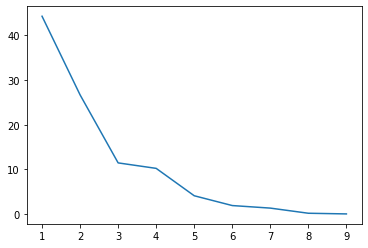

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,10), pca.explained_variance_ratio_*100)
plt.show()

In [ ]:
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']])

In [ ]:
datapca = pd.DataFrame(rez)
datapca.head(3)

,0,1,2,3,4,5,6,7,8
0,-1.484657,1.031337,-1.010343,0.186864,0.119499,-0.031618,-0.061852,-0.068541,-0.001258
1,-1.361582,-0.463980,-0.465408,-0.240765,-0.219724,-0.046046,-0.036032,-0.043589,-0.001342
2,-1.381851,-0.508025,-0.077561,-0.371622,0.007081,-0.194282,-0.060039,0.006438,-0.000417


In [ ]:
pcanames=[]
for i in range(9):
  pcanames.append('pc'+str(i+1))

datapca.columns=pcanames
datapca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.484657,1.031337,-1.010343,0.186864,0.119499,-0.031618,-0.061852,-0.068541,-0.001258
1,-1.361582,-0.463980,-0.465408,-0.240765,-0.219724,-0.046046,-0.036032,-0.043589,-0.001342
2,-1.381851,-0.508025,-0.077561,-0.371622,0.007081,-0.194282,-0.060039,0.006438,-0.000417
3,-1.278256,0.068600,0.022737,0.003241,0.003231,0.048220,-0.085801,-0.066368,-0.000835
4,-1.315172,-0.171229,0.193677,-0.384048,-0.071113,0.083529,0.013171,-0.054717,-0.001843


In [ ]:
datapca['Class'] = data_fillna_mean['Class'].copy()

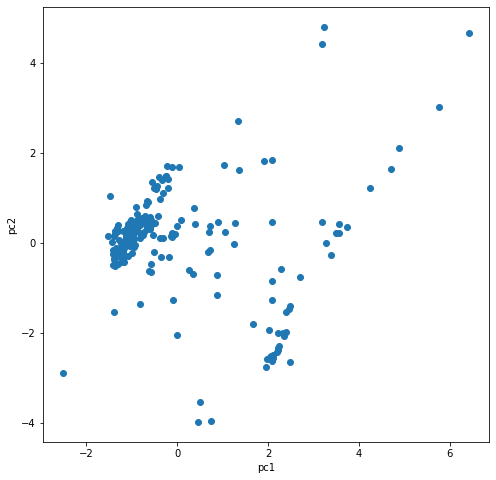

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(datapca['pc1'], datapca['pc2'])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

plt.show()

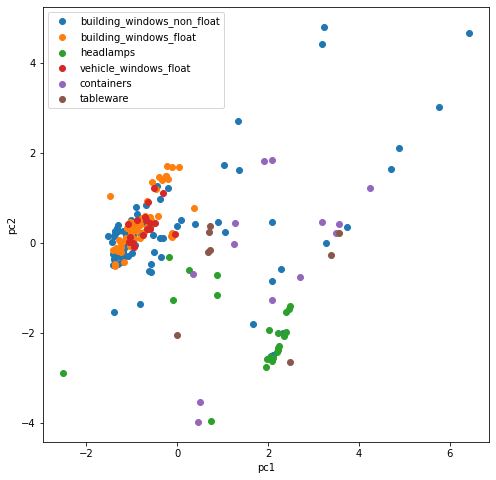

In [ ]:
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in datapca['Class'].value_counts().index.values:
  ax.scatter(datapca[col1][datapca['Class']==glassType],
             datapca[col2][datapca['Class']==glassType],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

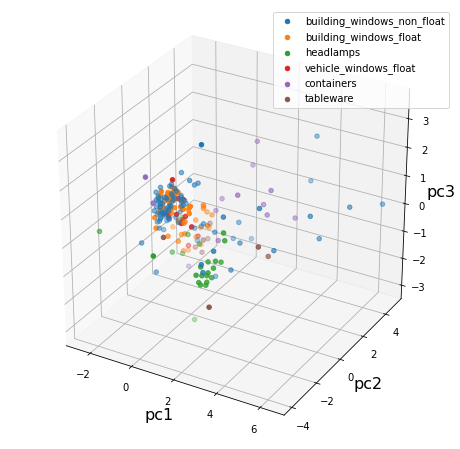

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in datapca['Class'].value_counts().index.values:
  ax.scatter(datapca['pc1'][datapca['Class']==glassType],
             datapca['pc2'][datapca['Class']==glassType],
             datapca['pc3'][datapca['Class']==glassType],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

# Корреляция

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as prepro
from sklearn.decomposition import PCA

from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
corr=data_fillna_mean.corr()
corr 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.137358,-0.115922,-0.329165,-0.563555,-0.261817,0.749650,0.048380,0.124013
Na,-0.137358,1.000000,-0.325483,0.087566,-0.081107,-0.261600,-0.097604,0.279835,-0.206346
Mg,-0.115922,-0.325483,1.000000,-0.440708,-0.154052,-0.039096,-0.352381,-0.480922,0.045782
Al,-0.329165,0.087566,-0.440708,1.000000,-0.011114,0.359946,-0.240567,0.434674,-0.027760
Si,-0.563555,-0.081107,-0.154052,-0.011114,1.000000,-0.092246,-0.208310,-0.137152,-0.084821
K,-0.261817,-0.261600,-0.039096,0.359946,-0.092246,1.000000,-0.295311,-0.020091,-0.026643
Ca,0.749650,-0.097604,-0.352381,-0.240567,-0.208310,-0.295311,1.000000,-0.136156,0.083994
Ba,0.048380,0.279835,-0.480922,0.434674,-0.137152,-0.020091,-0.136156,1.000000,-0.055752
Fe,0.124013,-0.206346,0.045782,-0.027760,-0.084821,-0.026643,0.083994,-0.055752,1.000000


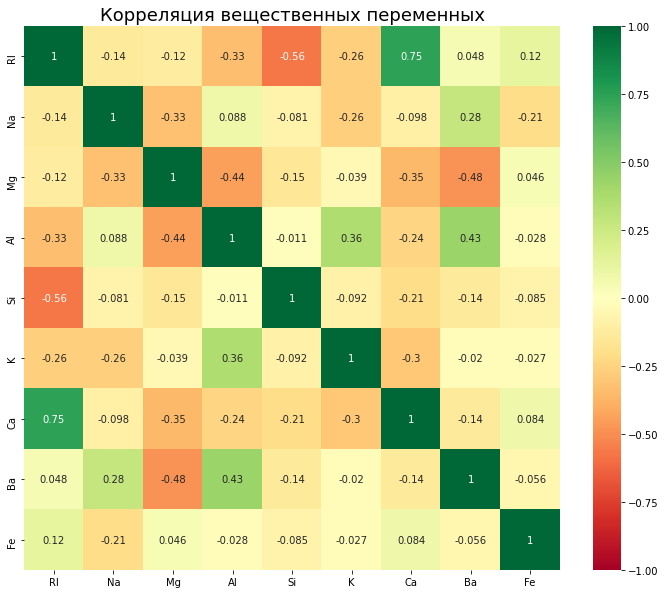

In [ ]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

Cильная корреляция(-1; -0.75) и (0.75; 1)
Средняя корреляция (-0.75; -0.45) и (0.45; 0.75)
Слабая корреляция (-0.45; -0.25) и (0.45; 0.25)

In [ ]:
corr[corr>0.54]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.00000,NaN,NaN,NaN,NaN,NaN,0.74965,NaN,NaN
Na,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Al,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Si,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Ca,0.74965,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


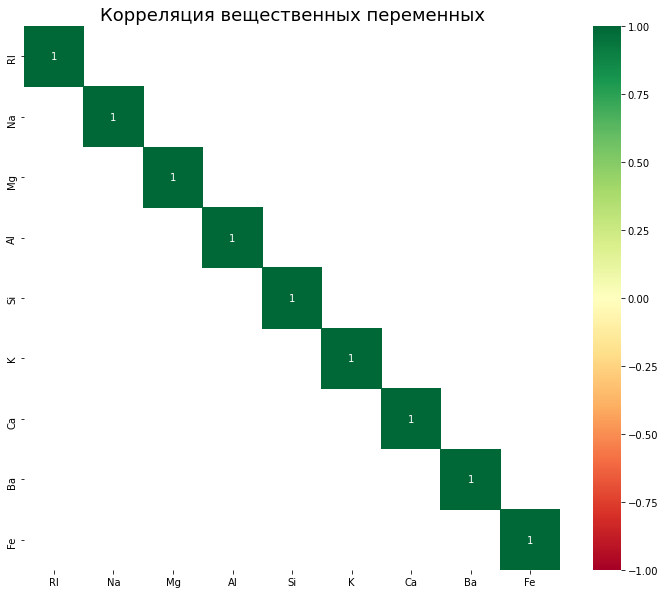

In [ ]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr[(corr>=0.75)|(corr<=-0.75)],
               annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

# Feature Importance

In [ ]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].mode(), inplace=True)

In [ ]:
forest=ExtraTreesClassifier(n_estimators=100)

#forest.fit(x,y)

forest.fit(
    data_fillna_mean[
                     data_fillna_mean.columns.values[
                                                     data_fillna_mean.columns.values != 'Class']
                     ],
           data_fillna_mean['Class']
           )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
data_fillna_mean['Class'].isna().sum()

0

In [ ]:
importances= forest.feature_importances_
importances

array([0.12736507, 0.10234936, 0.15803106, 0.1378798 , 0.09968305,
       0.10151755, 0.11130515, 0.08155413, 0.08031482])

In [ ]:
np.sort(importances)[::-1]

array([0.15803106, 0.1378798 , 0.12736507, 0.11130515, 0.10234936,
       0.10151755, 0.09968305, 0.08155413, 0.08031482])

In [ ]:
indices=np.argsort(importances)[::-1]
indices

array([2, 3, 0, 6, 1, 5, 4, 7, 8])

In [ ]:
print("Featire ranking")

for f in range (9):
  print("%d. feature %s (%f)" % ( f+1, data_fillna_mean.columns.values[indices[f]],
                importances[indices[f]]))

Featire ranking
1. feature Mg (0.158031)
2. feature Al (0.137880)
3. feature RI (0.127365)
4. feature Ca (0.111305)
5. feature Na (0.102349)
6. feature K (0.101518)
7. feature Si (0.099683)
8. feature Ba (0.081554)
9. feature Fe (0.080315)


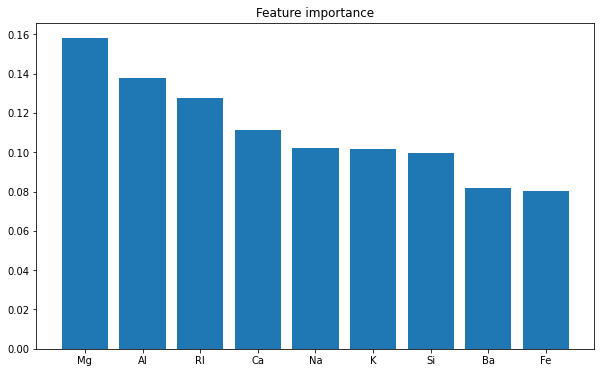

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature importance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices])
plt.show()

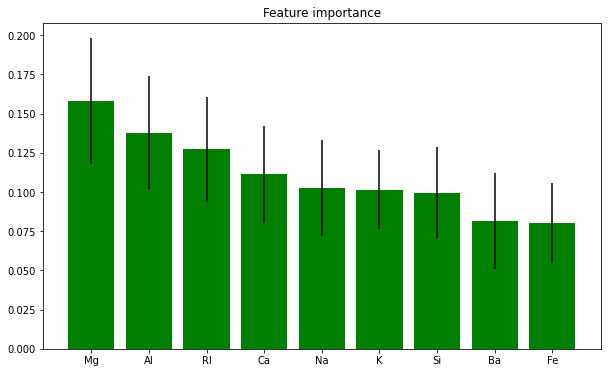

In [ ]:
std=np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature importance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices],
       color='g', yerr=std[indices],align="center")
plt.show()



Заполнить ещё 1 датафрейм по категориям


---

Построить графики heatmap для средних и слабых корреляций

In [ ]:
#@title Задание 1
#@markdown ---

data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean['RI'].fillna(data['RI'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean['Mg'].fillna(data['Mg'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean['Al'].fillna(data['Al'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean['Ca'].fillna(data['Ca'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean['K'].fillna(data['K'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean['Si'].fillna(data['Si'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean['Na'].fillna(data['Na'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean['Ba'].fillna(data['Ba'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean['Fe'].fillna(data['Fe'].value_counts().index.values[0],
                                 inplace=True)

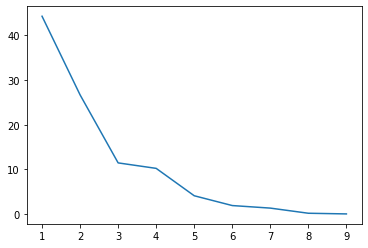

In [ ]:
pca = PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']])
pca.explained_variance_ratio_*100

fig, ax = plt.subplots()
ax.plot(np.arange(1,10), pca.explained_variance_ratio_*100)
plt.show()

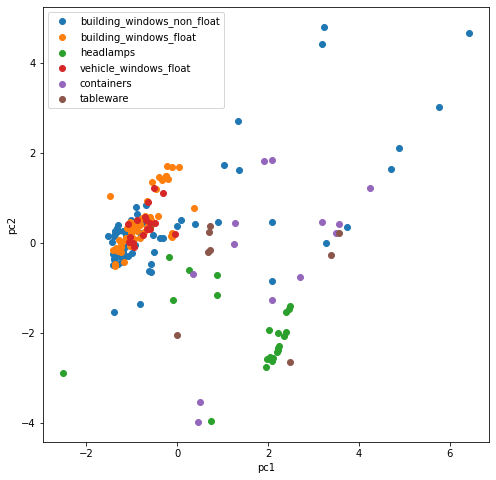

In [ ]:
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']])
datapca = pd.DataFrame(rez)

pcanames=[]
for i in range(9):
  pcanames.append('pc'+str(i+1))
datapca.columns=pcanames

datapca['Class'] = data_fillna_mean['Class'].copy()

col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in datapca['Class'].value_counts().index.values:
  ax.scatter(datapca[col1][datapca['Class']==glassType],
             datapca[col2][datapca['Class']==glassType],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

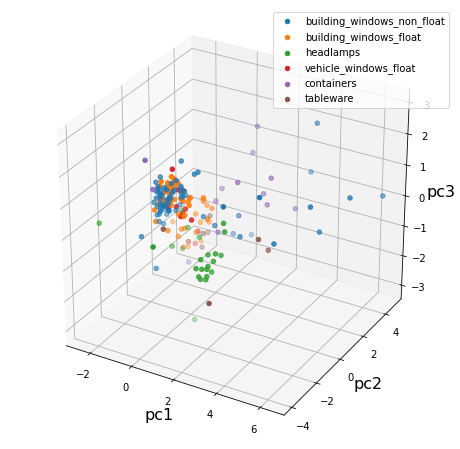

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in datapca['Class'].value_counts().index.values:
  ax.scatter(datapca['pc1'][datapca['Class']==glassType],
             datapca['pc2'][datapca['Class']==glassType],
             datapca['pc3'][datapca['Class']==glassType],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

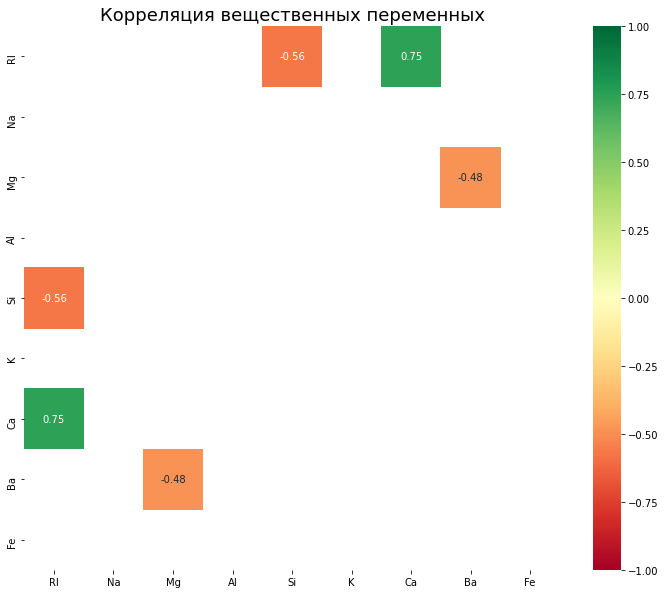

In [ ]:
#@title Задание 2
#@markdown ---

plt.figure(figsize=(12,10))

ax=sns.heatmap(corr[(corr>=0.45)&(corr<=0.75)|(corr>=-0.75)&(corr<=-0.45)],
               annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

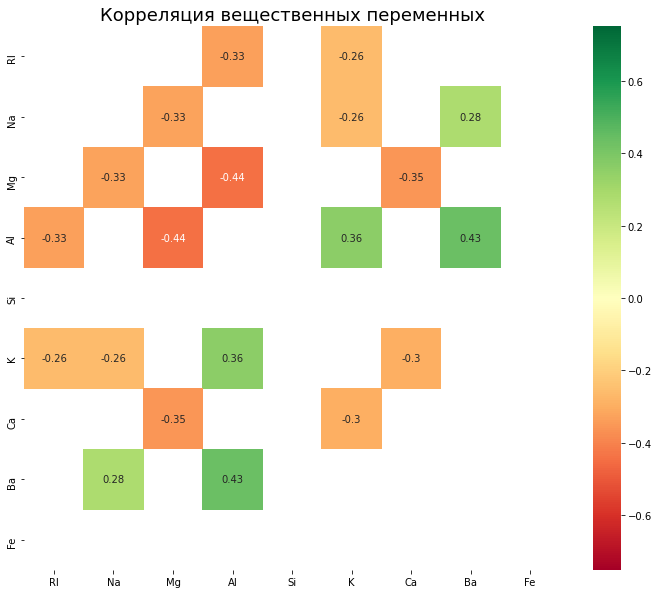

In [ ]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr[(corr>=0.25)&(corr<=0.45)|(corr>=-0.45)&(corr<=-0.25)],
               annot=True, vmax=0.75, vmin=-0.75, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()